<a href="https://colab.research.google.com/github/sychun/colab/blob/master/h_nn_gan_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow.keras as keras

In [5]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

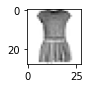

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1, 1))
plt.imshow(x_train[3], cmap='binary')
plt.show()

In [8]:
from tensorflow.keras import layers, models

In [13]:
input_image = layers.Input(shape=(784,)) # 28 x 28
dense1 = layers.Dense(32, activation="relu")
encoded = dense1(input_image)

dense2 = layers.Dense(784, activation='sigmoid')
decoded = dense2(encoded)

auto_encoder = models.Model(input_image, decoded)

auto_encoder.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [14]:
auto_encoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [15]:
import numpy as np

In [16]:
print( x_train.shape, x_train.max() )
x_train2 = x_train.astype('float32') / 255
x_test2 = x_test.astype('float32') / 255

x_train2 = x_train2.reshape((60000, 784))
# x_train2 = x_train2.reshape((x_train2.shape[0], np.prod(x_train2.shape[1]))
x_test2 = x_test2.reshape((10000, 784))
print (x_train2.shape, x_train2.max())

(60000, 28, 28) 255
(60000, 784) 1.0


In [17]:
auto_encoder.fit(x_train2, x_train2, batch_size=256, epochs=50, validation_data=(x_test2, x_test2))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3908 - val_loss: 0.3370
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.3248 - val_loss: 0.3182
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.3118 - val_loss: 0.3088
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.3050 - val_loss: 0.3034
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.3007 - val_loss: 0.3009
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2976 - val_loss: 0.2981
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2954 - val_loss: 0.2958
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2938 - val_loss: 0.2953
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2924 - val_loss: 0.2948
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2914 - val_loss: 0.2955

In [18]:
result = auto_encoder.predict(x_test2)

In [19]:
result.shape

(10000, 784)

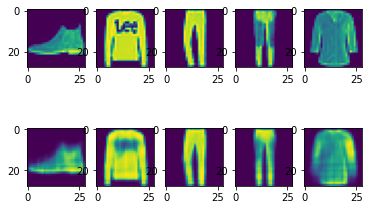

In [20]:
for idx in range(5):
  ax = plt.subplot(2, 5, idx+1)
  t_image = x_test2[idx].reshape((28, 28))
  plt.imshow(t_image)

  ax = plt.subplot(2, 5, idx+1 + 5)
  p_image = result[idx].reshape((28, 28))
  plt.imshow(p_image)